## Import required Libraries and packages

In [20]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

import sklearn as sk
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
rcParams['figure.figsize'] = 10, 5
sb.set_style('whitegrid')
np.set_printoptions(precision=4, suppress=True)

### Import data from sklearn package datasets and setting up the data

In [21]:
data = datasets.load_diabetes()

In [22]:
df = DataFrame(data.data, columns=data.feature_names)

In [23]:
df['class'] = data.target

In [24]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,class
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## EDA

<Axes: >

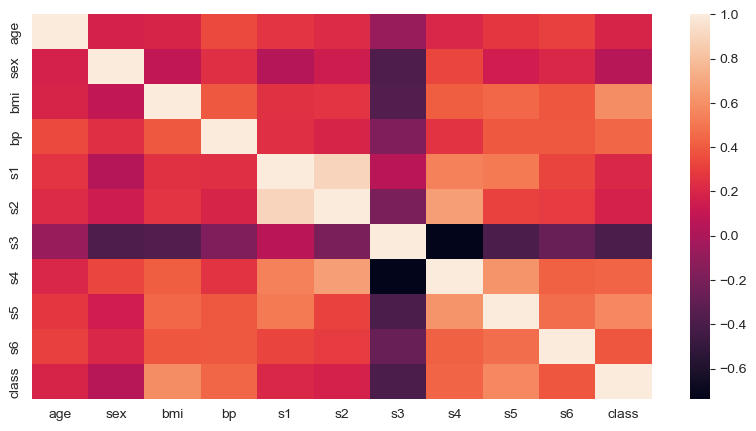

In [25]:
sb.heatmap(df.corr())

In [26]:
selected_cols = df.corr()['class'].sort_values(ascending=False).index.tolist()[:-2]

In [27]:
df = df[selected_cols]

In [28]:
df

,class,bmi,s5,bp,s4,s6,s1,age,s2
0,151.0,0.061696,0.019907,0.021872,-0.002592,-0.017646,-0.044223,0.038076,-0.034821
1,75.0,-0.051474,-0.068332,-0.026328,-0.039493,-0.092204,-0.008449,-0.001882,-0.019163
2,141.0,0.044451,0.002861,-0.005670,-0.002592,-0.025930,-0.045599,0.085299,-0.034194
3,206.0,-0.011595,0.022688,-0.036656,0.034309,-0.009362,0.012191,-0.089063,0.024991
4,135.0,-0.036385,-0.031988,0.021872,-0.002592,-0.046641,0.003935,0.005383,0.015596
...,...,...,...,...,...,...,...,...,...
437,178.0,0.019662,0.031193,0.059744,-0.002592,0.007207,-0.005697,0.041708,-0.002566
438,104.0,-0.015906,-0.018114,-0.067642,0.034309,0.044485,0.049341,-0.005515,0.079165
439,132.0,-0.015906,-0.046883,0.017293,-0.011080,0.015491,-0.037344,0.041708,-0.013840
440,220.0,0.039062,0.044529,0.001215,0.026560,-0.025930,0.016318,-0.045472,0.015283


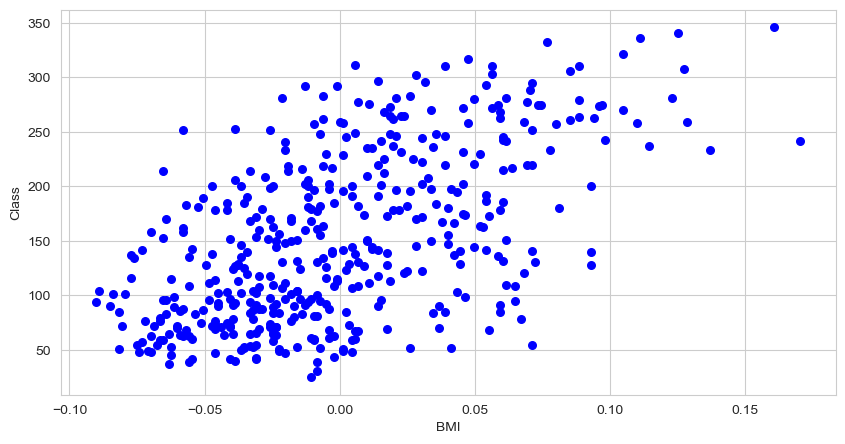

In [29]:
plt.scatter(df.iloc[:, 1], df['class'], color='b', marker='o', s=30)
plt.xlabel('BMI')
plt.ylabel('Class')
plt.show()

## Splitting data and Model Fitting

In [30]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=12)

In [31]:
print("X_train:" , X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (331, 8) X_test: (111, 8) y_train: (331,) y_test: (111,)


## Implementation of Linear Regression with cost function and Minimization approach (Gradient Descent)

In [32]:
# class LinearRegression:
    
#     def __init__(self, lr=0.001, n_iters=1000):
#         self.lr = lr
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None
    
#     # Fit method uses gradient descent 
#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.weights = np.zeros(n_features)
#         self.bias = 0
        
#         for _ in range(self.n_iters):
#             y_preds = np.dot(X, self.weights) + self.bias
            
#             dw = (1 / n_samples) * np.dot(X.T, (y_preds - y))
#             db = (1 / n_samples) * np.sum(y_preds - y)
            
#             self.weights-= self.lr * dw
#             self.bias -= self.lr * db
            
#     def predict(self, X):
#         y_preds = np.dot(X, self.weights) + self.bias
#         return y_preds

class LinearRegression:
    
    def __init__(self, lr=0.001, n_iters=1000, regularization=None, lambda_=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_preds = np.dot(X, self.weights) + self.bias
            
            dw = (1 / n_samples) * (np.dot(X.T, (y_preds - y)) + self.lambda_ * np.sign(self.weights))
            db = (1 / n_samples) * np.sum(y_preds - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_preds = np.dot(X, self.weights) + self.bias
        return y_preds

In [33]:
def MSE(y_actual, y_preds):
    return np.mean((y_actual - y_preds) ** 2)

In [34]:
linear = LinearRegression(lr=0.1, n_iters=20000, regularization=10, lambda_=10)
linear.fit(X_train, y_train)

In [35]:
preds = linear.predict(X_test)

In [37]:
preds

array([226.9792, 110.603 , 147.9286, 107.736 , 191.0901, 141.2455,
       113.9982, 174.5388, 152.4243, 190.7403, 241.3169, 183.5797,
       138.5947, 128.2152,  61.7526, 219.4866, 156.8432,  68.7466,
       161.2211, 169.4754, 112.6313,  80.9395, 240.7687, 154.3234,
       180.9676, 119.5546, 166.2592, 101.9129,  88.5417, 123.6952,
       156.3935, 170.2159, 187.1407, 120.9008,  91.8596, 185.432 ,
        97.1244, 191.8154, 163.2627, 146.8995, 240.4908, 220.3696,
       128.8227,  77.9576, 178.7993, 104.8174, 179.3209,  96.3347,
       215.9507, 247.0159, 101.5894, 122.6117, 204.2575, 148.1756,
       156.3747, 160.9867, 147.4317, 206.5844, 206.4829, 189.5231,
       261.195 , 130.9927, 150.6322,  99.3754,  48.0263,  49.8866,
       154.606 , 218.0162, 105.2339, 180.8946, 116.7031, 110.0586,
       130.3715,  88.0416, 146.1055, 165.2508, 169.3738, 112.3543,
       183.3083, 212.2269, 119.8392, 162.4729, 119.5061,  86.6998,
       137.6321, 166.154 , 224.495 , 152.6467,  51.8084, 121.7

In [38]:
MSE(y_test, preds)

3503.376208209822

In [39]:
r2_score(y_test, preds)

0.38561703705693373